# Hand Gestures to Alphabetical Sign Language
Rohit Vichare
Pranav Yede
Aarya Shelar

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization
import tensorflow.keras
import requests

import random
import string

# Importing data

In [3]:
filepath_train = 'sign_mnist_train.csv'
filepath_test = 'sign_mnist_test.csv'

train = pd.read_csv(filepath_train)
test = pd.read_csv(filepath_test)

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Preprocessing

In [5]:
labels = train['label'].values

In [6]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot: ylabel='count'>

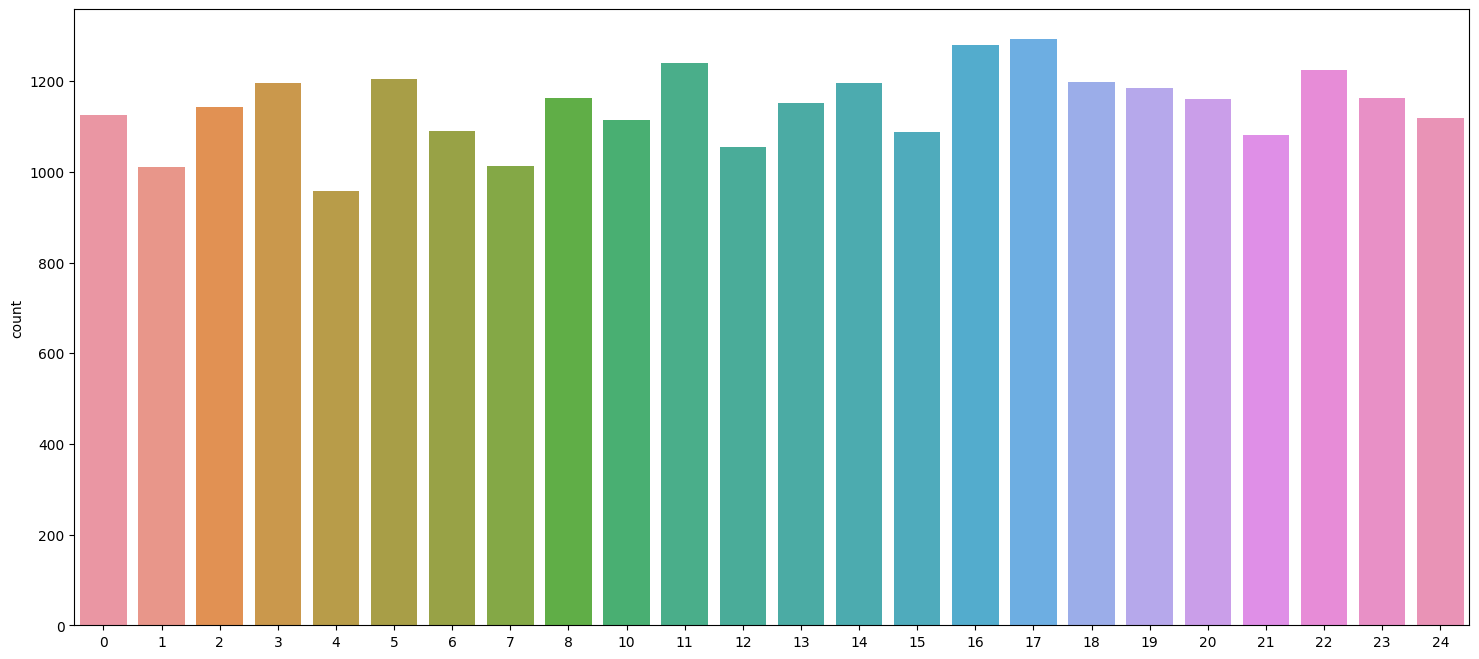

In [7]:
plt.figure(figsize = (18,8))
sns.countplot(x = labels)

In [8]:
# Drop Training labels from our training data so we can separate it 
train.drop('label',axis = 1,inplace = True)

In [9]:
# Reshaping n Flatening 
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
# one hot encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


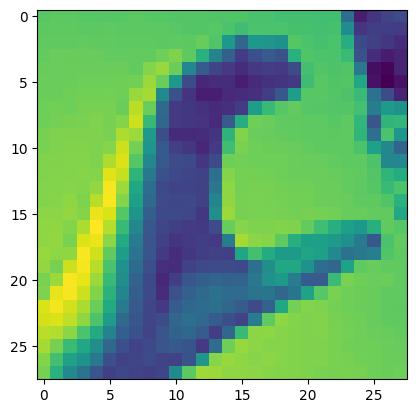

In [12]:
# image 
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [13]:
# Useing OpenCV to View 10 random images from training data
import cv2
import numpy as np
 
for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample,None, fx=10,fy=10,interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [14]:
# Split our data into x_train, x_test,y_test&y_train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [15]:
# Start Loading our tensorflow modules & define our batch size etc
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
batch_size = 128
num_classes = 24
epochs = 10

In [16]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255


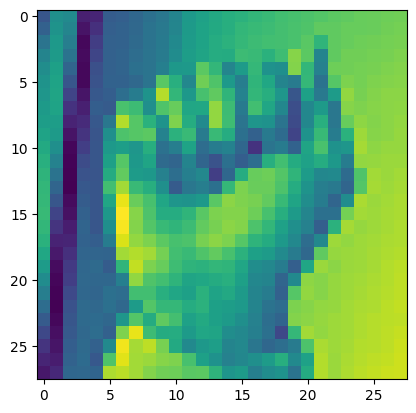

In [17]:
# since X_train[i] data is of shape (784,)  reshape image to 28,28 (req. for tf & Keras)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

plt.imshow(x_train[0].reshape(28,28))

In [18]:
# Normalize pixel values to be between 0 and 1
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,20))

model.add(Dense(num_classes,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [19]:
#model.compile(loss = 'categorical_crossentropy',
  #           optimizer = Adam(),
   #          metrics=['accuracy'])

In [23]:
#history = model.fit(x_train,y_train,validation_data = ((x_test,y_test)),epochs=epochs,batch_size=batch_size)

Epoch 1/10


TypeError: in user code:

    File "C:\Users\shrey\.conda\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\shrey\.conda\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\shrey\.conda\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\shrey\.conda\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\shrey\.conda\envs\tenserflow\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\shrey\.conda\envs\tenserflow\lib\site-packages\keras\layers\regularization\dropout.py", line 99, in _get_noise_shape
        for i, value in enumerate(self.noise_shape):

    TypeError: Exception encountered when calling layer "dropout" (type Dropout).
    
    'int' object is not iterable
    
    Call arguments received by layer "dropout" (type Dropout):
      • inputs=tf.Tensor(shape=(None, 128), dtype=float32)
      • training=True


In [24]:
# Saving Model
#model.save("my_h5_model.h5")
#print("Model Saved")

Model Saved


In [20]:
from tensorflow.keras.models import load_model
from tensorflow import keras 
model = load_model("my_h5_model.h5")

In [24]:
# Reshape our test data so that we can evaluate its performance on un seen data
test_labels = test['label']
test.drop('label',axis = 1,inplace=True)

test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0],28 ,28 ,1)
test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 1s 4ms/step


In [25]:
# Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels,y_pred.round())

0.7915504740658115

In [26]:
# Create function to match label to letter
def getLetter(result):
    classLabels = {
        0: 'a',
        1: 'b',
        2: 'c',
        3: 'd',
        4: 'e',
        5: 'f',
        6: 'g',
        7: 'h',
        8: 'i',
        9: 'k',
        10: 'l',
        11: 'm',
        12: 'n',
        13: 'o',
        14: 'p',
        15: 'q',
        16: 'r',
        17: 's',
        18: 't',
        19: 'u',
        20: 'v',
        21: 'w',
        22: 'x',
        23: 'y'
    }
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [28]:
import tkinter as tk
def split(word):
    return [char for char in word]

def join(getarray):
    word = ''.join(getarray)
    return word

def remnjoin(test_str):
    new_str = ""
    for i in range(len(test_str)):
        if i != 0:
            new_str = new_str + test_str[i]
    return new_str

def opencvcaptureforwords():
    word_site = "https://www.mit.edu/~ecprice/wordlist.10000"
    response = requests.get(word_site)
    WORDS = response.content.splitlines()
    Displayword = WORDS[random.randint(0,10000)].decode("utf-8") 

    wordsrem = Displayword
    nl = '\n'
    cap = cv2.VideoCapture(0)
    while True:
        ret,frame = cap.read()

    #     frame = cv2.flip(freame,1)
        roi = frame[100:400, 320:620]
    #     cv2.imshow('roi',roi)
        roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
        roi = cv2.resize(roi,(28,28),interpolation = cv2.INTER_AREA)

    #     cv2.imshow('roi sacled & gray',roi)
        copy = frame.copy()
        cv2.rectangle(copy,(320,100),(620,400),(255,0,0),5)

        roi = roi.reshape(1,28,28,1)
        result = model.predict_classes(roi,1,verbose = 0)[0]
        if getLetter(result) == wordsrem[0]:
            wordsrem = remnjoin(wordsrem)
            
        cv2.putText(copy, f'{getLetter(result)} || predict : - {wordsrem}',(100,100), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow('frame',copy)

        if wordsrem == '':
            break

        keyCode = cv2.waitKey(1)

        if cv2.getWindowProperty('frame', cv2.WND_PROP_VISIBLE) <1:
            break
        if cv2.waitKey(1) == 1: 
            print("itis pressed")
            break
    cap.release()
    cv2.destroyAllWindows()

def opencvforallLetter():
    a = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

    cap = cv2.VideoCapture(0)
    while True:
        ret,frame = cap.read()

    #     frame = cv2.flip(freame,1)
        roi = frame[100:400, 320:620]
    #     cv2.imshow('roi',roi)
        roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
        roi = cv2.resize(roi,(28,28),interpolation = cv2.INTER_AREA)

    #     cv2.imshow('roi sacled & gray',roi)
        copy = frame.copy()
        cv2.rectangle(copy,(320,100),(620,400),(255,0,0),5)

        roi = roi.reshape(1,28,28,1)
        result = model.predict_classes(roi,1,verbose = 0)[0]
        if getLetter(result) == a[0]:
            a.pop(0)
        cv2.putText(copy, f'{getLetter(result)} || letter to predict {str(a[0])}',(100,100), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow('frame',copy)

        keyCode = cv2.waitKey(1)

        if cv2.getWindowProperty('frame', cv2.WND_PROP_VISIBLE) <1:
            break
        if cv2.waitKey(1) == 1: 
            print("itis pressed")
            break
    cap.release()
    cv2.destroyAllWindows()
    

def opencvforpracletters(letter):
    wordsrem = letter
    nl = '\n'
    cap = cv2.VideoCapture(0)
    while True:
        ret,frame = cap.read()

    #     frame = cv2.flip(freame,1)
        roi = frame[100:400, 320:620]
    #     cv2.imshow('roi',roi)
        roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
        roi = cv2.resize(roi,(28,28),interpolation = cv2.INTER_AREA)

    #     cv2.imshow('roi sacled & gray',roi)
        copy = frame.copy()
        cv2.rectangle(copy,(320,100),(620,400),(255,0,0),5)

        roi = roi.reshape(1,28,28,1)
        result = model.predict_classes(roi,1,verbose = 0)[0]
        if getLetter(result) == wordsrem[0]:
            wordsrem = remnjoin(wordsrem)
            
        cv2.putText(copy, f'{getLetter(result)} || predict : - {wordsrem}',(100,100), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow('frame',copy)

        if wordsrem == '':
            break

        keyCode = cv2.waitKey(1)

        if cv2.getWindowProperty('frame', cv2.WND_PROP_VISIBLE) <1:
            break
        if cv2.waitKey(1) == 1: 
            print("itis pressed")
            break
    cap.release()
    cv2.destroyAllWindows()

    
def getletter():
    
    
     
    # Toplevel object which will
    # be treated as a new window
    newWindow = tk.Toplevel(win)
 
    # sets the title of the
    # Toplevel widget
    newWindow.title("Enter the word / Letter")
 
    # sets the geometry of toplevel
    newWindow.geometry("200x200")
 
    # A Label widget to show in toplevel
    tk.Label(newWindow,
          text ="Enter the letter to Practice ").pack()
    T = tk.Entry(newWindow, width=60)
    T.pack()
    print(str(T.get()))
    tk.Button(newWindow, text ="Submit", command = lambda: opencvforpracletters(str(T.get()))).pack()

In [29]:
import tkinter as tk
win= tk.Tk()
win.title("Finger Pointing Tutor")
#Set the geometry of tkinter frame
win.geometry("750x250")

    
   
    

#Create a Label for Single Letter Learning
singleLetter = tk.Label(win, text = "Learn for single Letter").place(x = 30,y = 50)  
singlebtn = tk.Button(win, text="Press Enter", command= getletter).place(x = 30 , y=70)
#creating label for all letters Learning
allLetter = tk.Label(win, text = "Learn with all the letters").place(x = 30, y = 100)  
allbtn = tk.Button(win, text="Press Enter", command= opencvforallLetter).place(x = 30 , y=120)
#Creating Label for Words Learning 
wordLetter = tk.Label(win, text = "Learn with words").place(x = 30, y = 150)  
allbtn  = tk.Button(win, text="Press Enter", command= opencvcaptureforwords).place(x = 30 , y=170)



win.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\shrey\.conda\envs\tenserflow\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\shrey\AppData\Local\Temp\ipykernel_22828\3066380865.py", line 154, in <lambda>
    tk.Button(newWindow, text ="Submit", command = lambda: opencvforpracletters(str(T.get()))).pack()
  File "C:\Users\shrey\AppData\Local\Temp\ipykernel_22828\3066380865.py", line 112, in opencvforpracletters
    result = model.predict_classes(roi,1,verbose = 0)[0]
AttributeError: 'Sequential' object has no attribute 'predict_classes'


# Thank You !

In [4]:
pip install tkinter

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [57]:
import tkinter
